In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

import csv 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [2]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [3]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [4]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [8]:
sum(city_data_df['type']=="Suburban")

36

In [9]:
sum(city_data_df['type']=='Rural')

18

In [10]:
# Get the columns and the rows that are not null.
ride_data_df.count()


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
#null data in ride_data_df 
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
#merge two dataframes 
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=['city', 'city'], how='left')
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
#urban dataframe to get rides number 
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=='Suburban']
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [16]:
rural_cities_df=pyber_data_df[pyber_data_df['type'] == 'Rural']
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [17]:
# Get the number of rides for urban cities with groupby()
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [18]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [19]:
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count 

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [20]:
# Get average fare for each city in the urban cities with groupby and mean()
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

In [22]:
rural_avg_fare=rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [23]:
# Get the average number of drivers for each urban city with groupby city and mean() driver count 
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [24]:
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()["driver_count"]
suburban_driver_count 

city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.0
Veronicaberg          20.0
Victoriaport          16.0
West Hannah           12.0
West Kimmouth          4.0
Williamsonville        2.0
Name: driver_count, dty

In [25]:
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

<IPython.core.display.Javascript object>


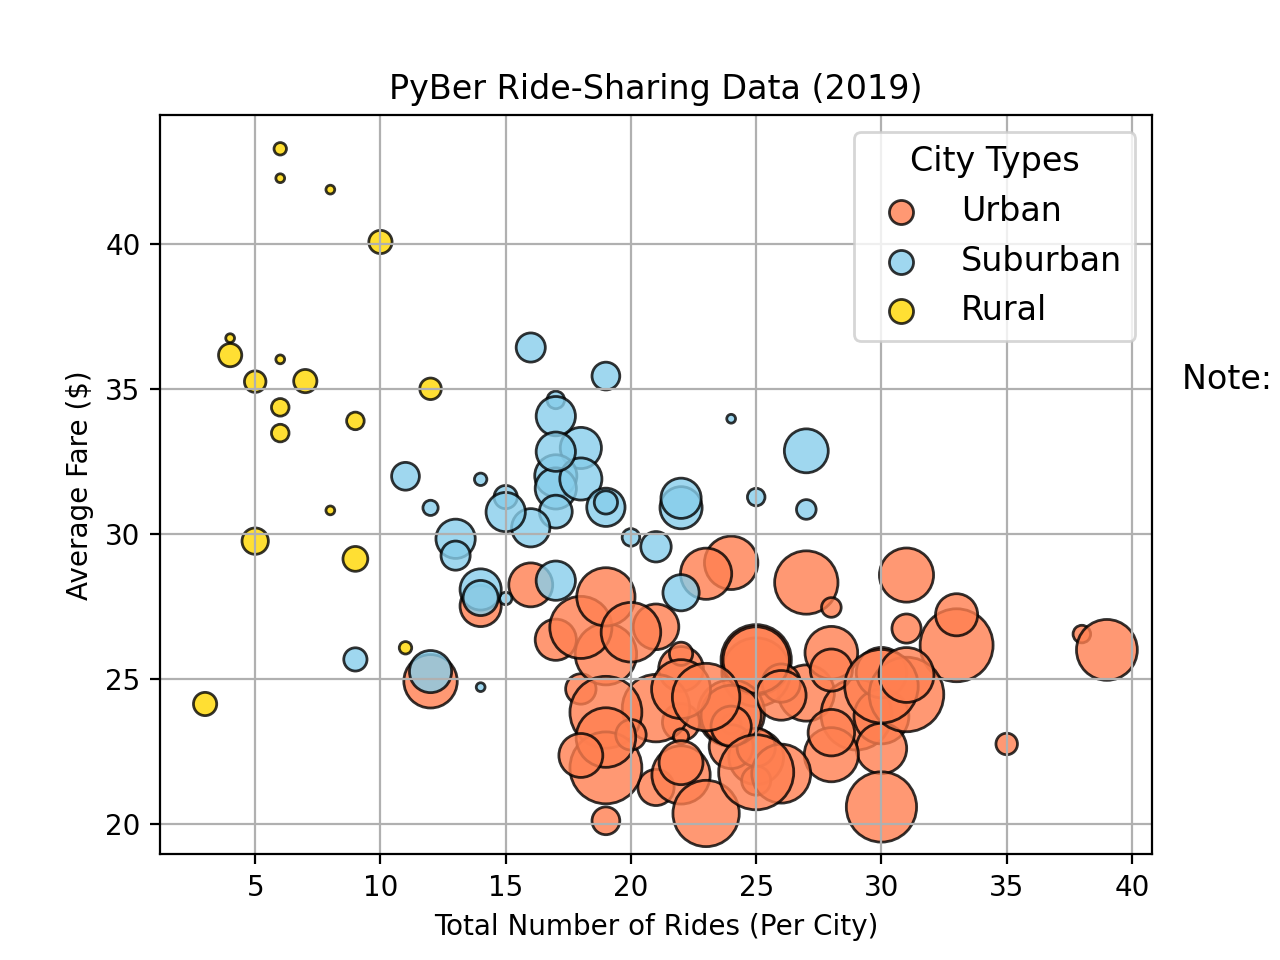

In [26]:
# Build the scatter plots for urban suburban and rural cities.
plt.scatter(urban_ride_count, urban_avg_fare,
           s=10*urban_driver_count, c='coral',
           edgecolor='black', linewidth=1,
           alpha=0.8,label='Urban')
plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor="black", linewidths=1,alpha=0.8, 
            label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

In [27]:
#create a legend, mode= to fit the area horizontally/loc= for the legend is where it will fit the "best" based on the plotting
#set each marker with legendHandles[]._sizes=[index]
lgnd=plt.legend(fontsize="12", mode="Expanded",
               scatterpoints=1, loc='best', title ='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

In [28]:
# Incorporate a text label about circle size to add a note 
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")


Text(42, 35, 'Note: Circle size correlates with driver count per city.')

In [29]:
#save the figure 
plt.savefig("analysis/Fig1.png")

In [30]:
#get the statistics of three df 
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [31]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [32]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [33]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [34]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [35]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [36]:
#calculate the mean of the ride count for each city type round() to two decimal
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [37]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [38]:
#calculate the mode() of urban ride count 
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [39]:
suburban_ride_count.mode()

0    17
dtype: int64

In [40]:
rural_ride_count.mode()

0    6
dtype: int64

In [41]:
#import NumPy and SciPy statistics medule 
import numpy as np 
import scipy.stats as sts 


In [42]:
#calculate the measures of central tendency of dataframe with numpy and scipy statistics (will show how many times
#mode appears in the dataset)
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [43]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count:.2f}.")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.00.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [44]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count:.2f}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.00.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [45]:
#get the fare of each city type 
urban_fares=urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [46]:
mean_urban_fares=np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [47]:
#get the fare statistics of suburban type 
suburban_fares = suburban_cities_df['fare']
mean_suburban_fares=np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [48]:
#get the fare statistics of rural type 
rural_fares = rural_cities_df['fare']
mean_rural_fares=np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [49]:
#get the driver count by city type 
urban_drivers = urban_cities_df['driver_count']
mean_urban_drivers=np.mean(urban_drivers)
print(f"The mean driver for urban trips is {mean_urban_drivers:.2f}.")
median_urban_drivers = np.median(urban_drivers)
print(f"The median driver for urban trips is {median_urban_drivers:.2f}.")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver for urban trips is {mode_urban_drivers}.")

The mean driver for urban trips is 36.68.
The median driver for urban trips is 37.00.
The mode driver for urban trips is ModeResult(mode=array([39]), count=array([86])).


In [50]:
suburban_drivers = suburban_cities_df['driver_count']
mean_suburban_drivers=np.mean(suburban_drivers)
print(f"The mean driver for suburban trips is {mean_suburban_drivers:.2f}.")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver for suburban trips is {median_suburban_drivers:.2f}.")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver for suburban trips is {mode_suburban_drivers}.")

The mean driver for suburban trips is 13.71.
The median driver for suburban trips is 16.00.
The mode driver for suburban trips is ModeResult(mode=array([20]), count=array([79])).


In [51]:
rural_drivers = rural_cities_df['driver_count']
mean_rural_drivers=np.mean(rural_drivers)
print(f"The mean driver for rural trips is {mean_rural_drivers:.2f}.")
median_rural_drivers = np.median(rural_drivers)
print(f"The median driver for rural trips is {median_rural_drivers:.2f}.")
mode_rural_drivers = sts.mode(suburban_drivers)
print(f"The mode driver for rural trips is {mode_rural_drivers}.")

The mean driver for rural trips is 4.30.
The median driver for rural trips is 4.00.
The mode driver for rural trips is ModeResult(mode=array([20]), count=array([79])).


<IPython.core.display.Javascript object>


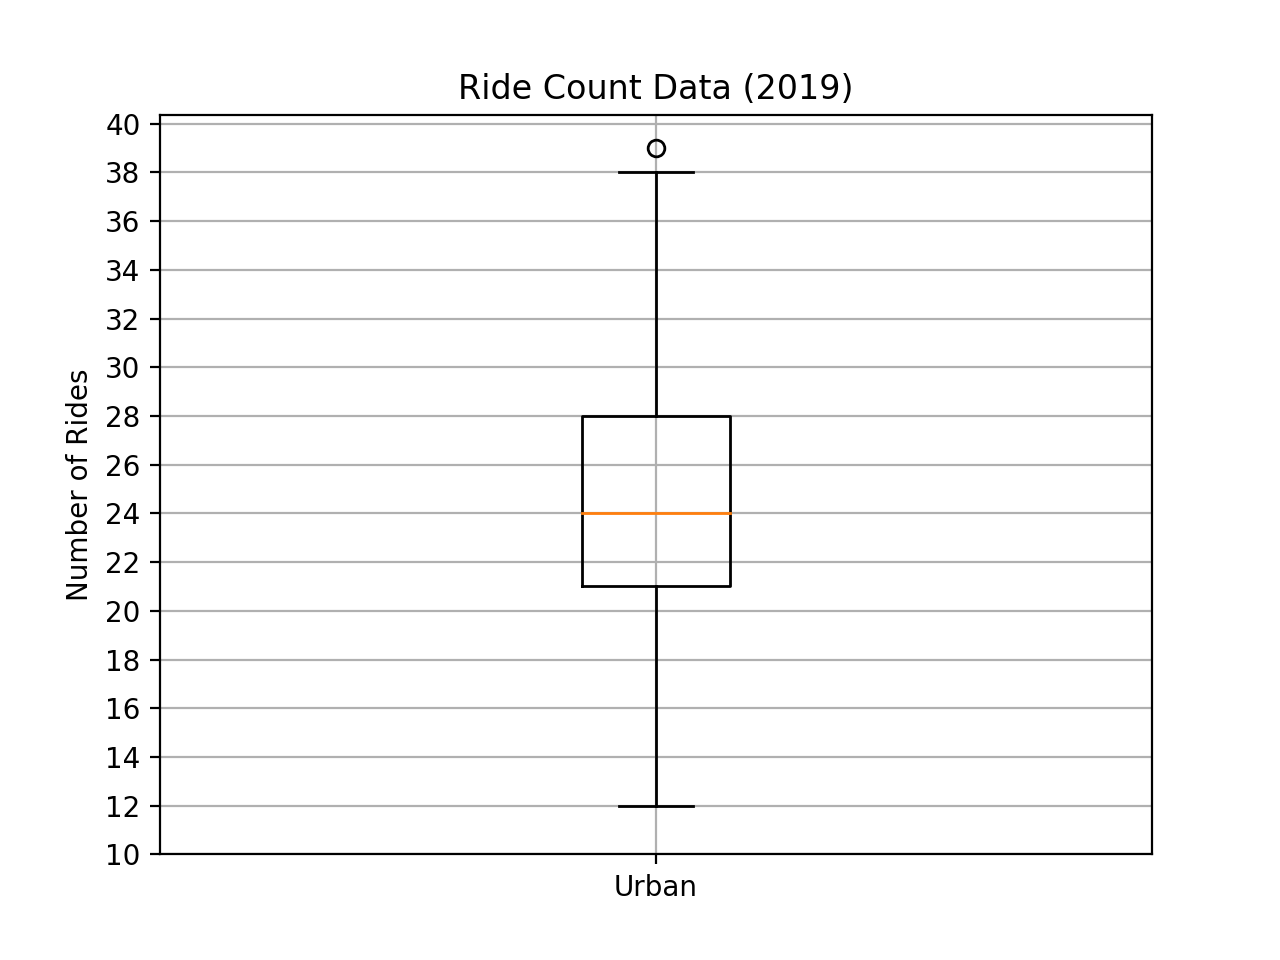

In [52]:
#create a box-and-whisker plot for the urban cities ride count 
x_labels = ["Urban"]
fig,ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

<IPython.core.display.Javascript object>


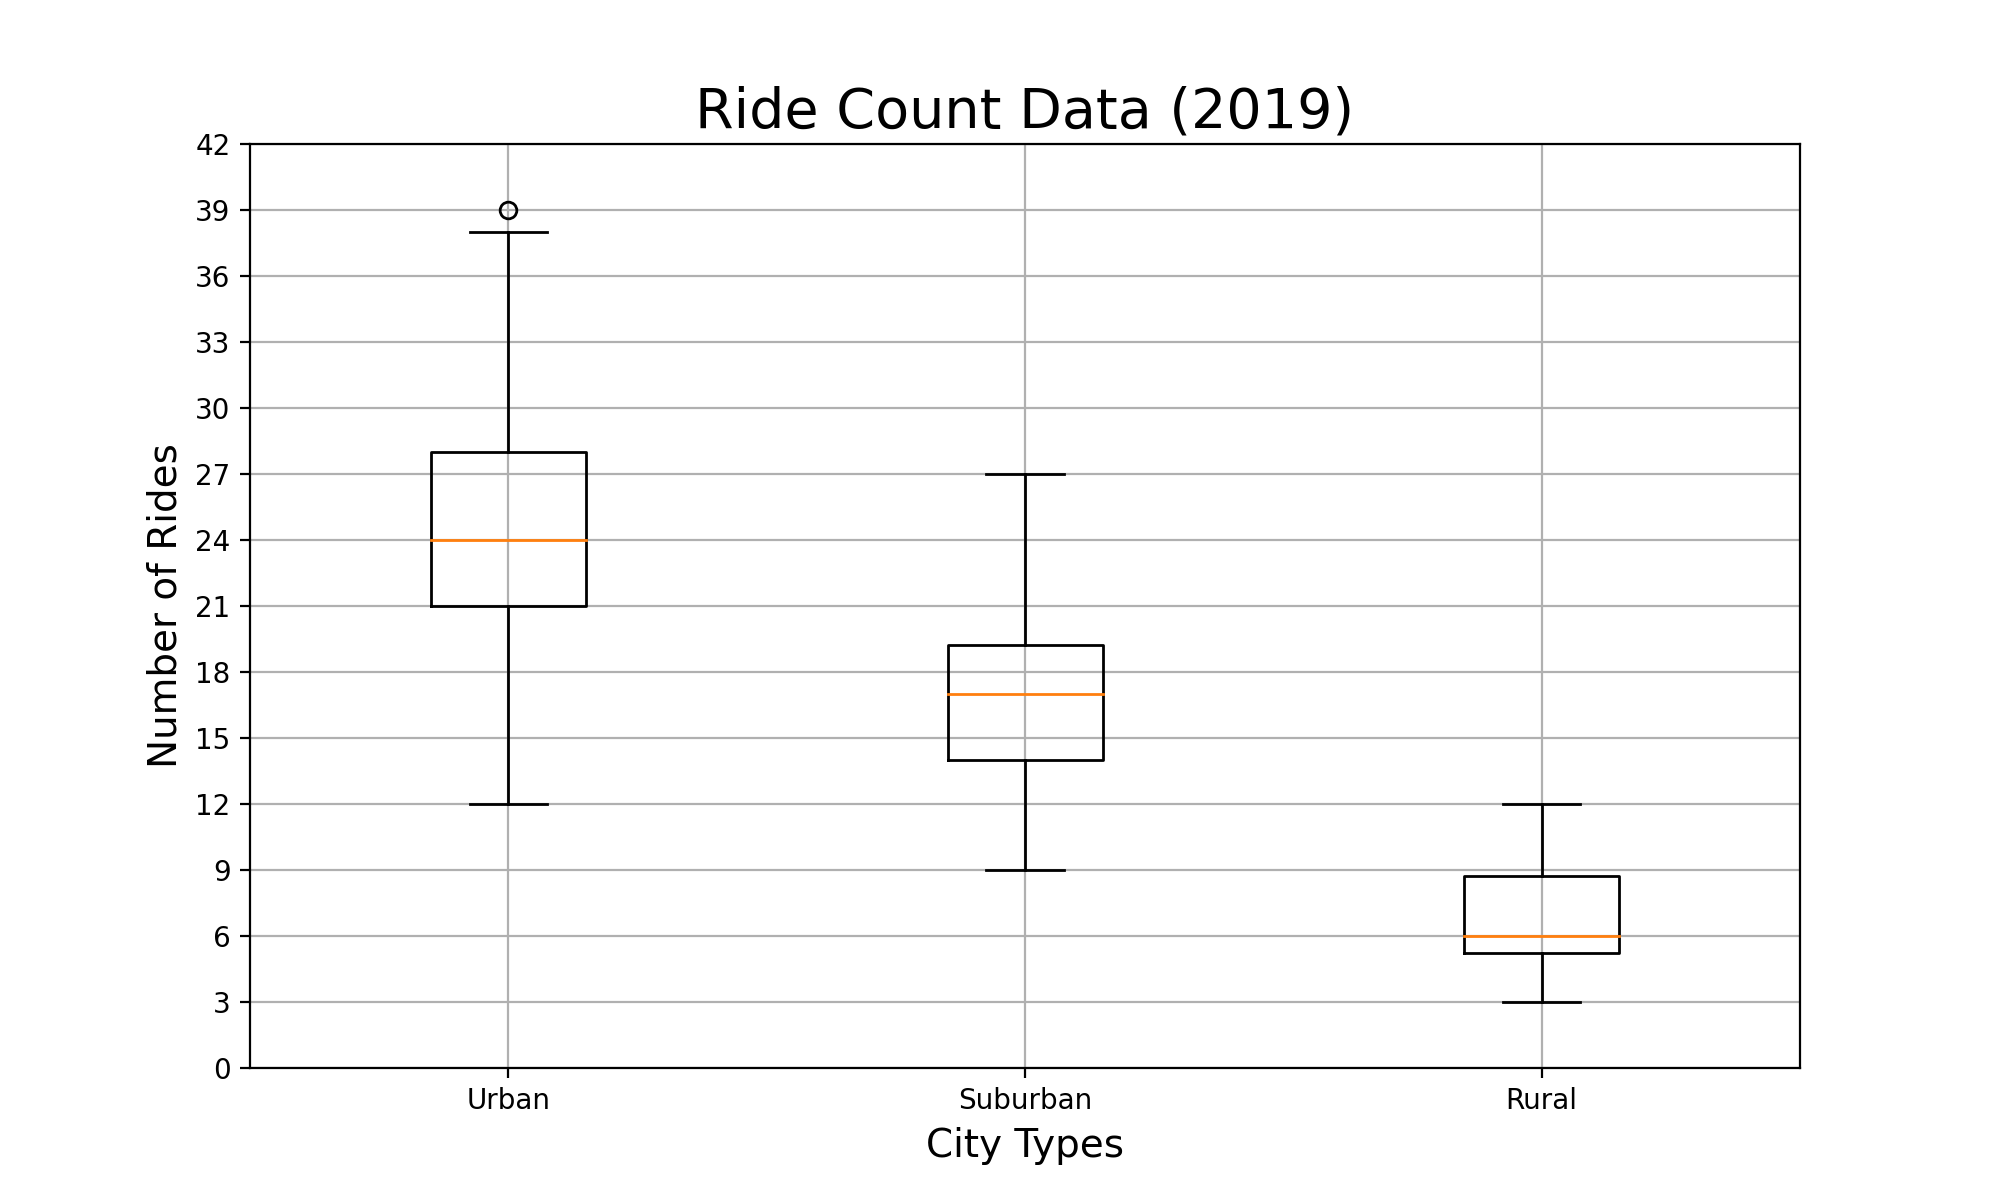

In [53]:
#add three city types into one graphic both x and y should be array
x_labels = ["Urban", 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig,ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.savefig("analysis/Fig2.png")
plt.show()

In [54]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


<IPython.core.display.Javascript object>


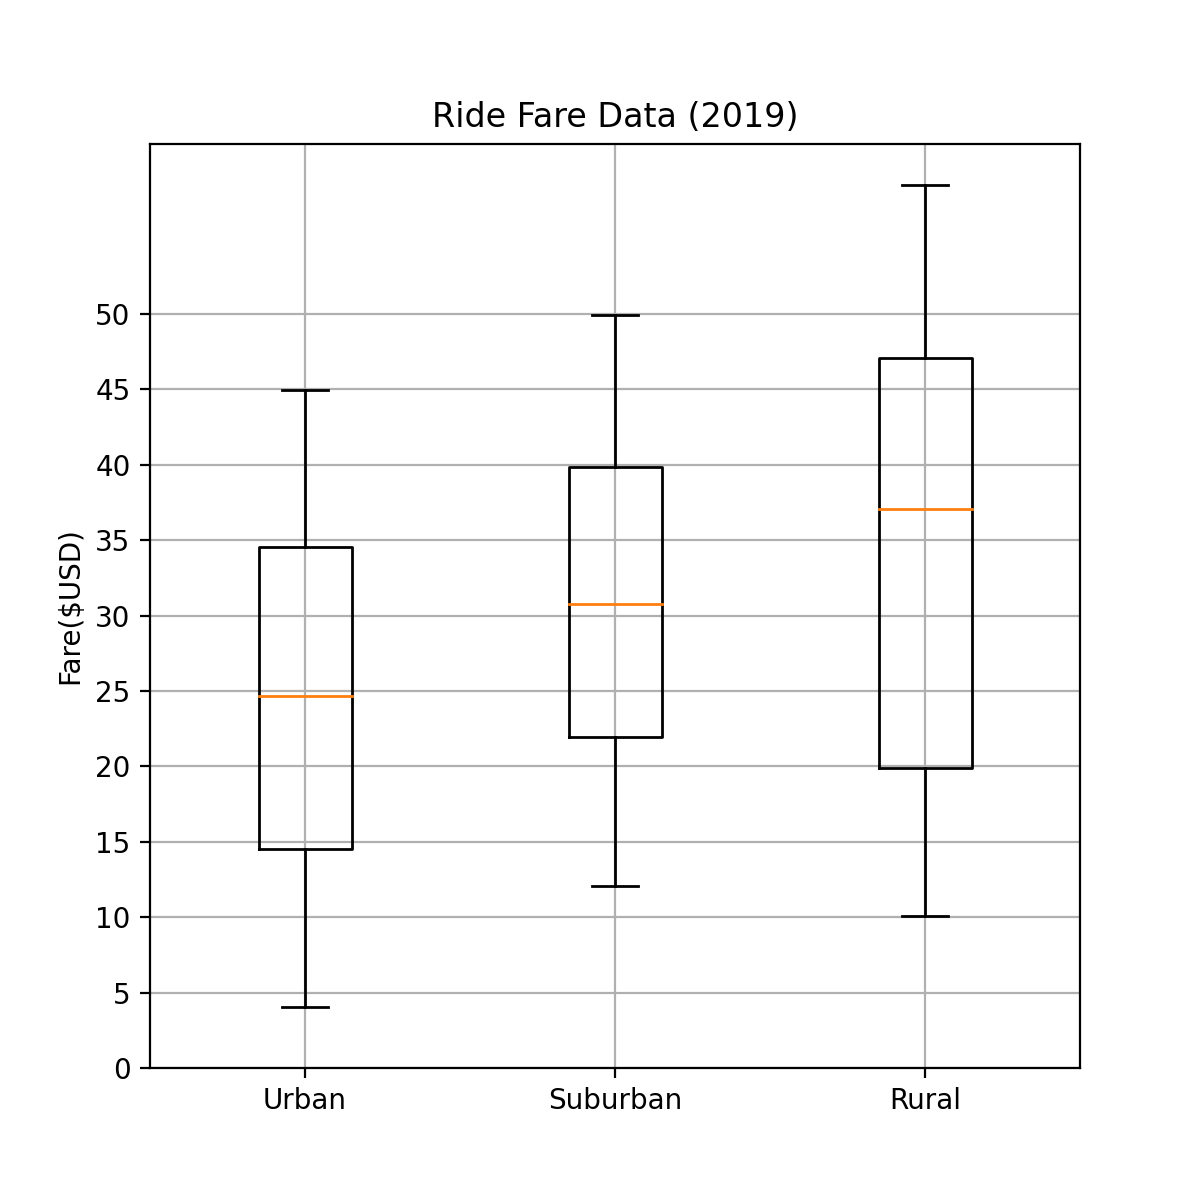

Summary Statistics


In [55]:
#ride fare data with box-whisker plot 
x_labels = ["Urban", "Suburban", 'Rural']
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(6,6))
ax.boxplot(fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 55, step=5.0))
ax.grid()
plt.show()
plt.savefig("analysis/Fig3.png")
print("Summary Statistics")


<IPython.core.display.Javascript object>


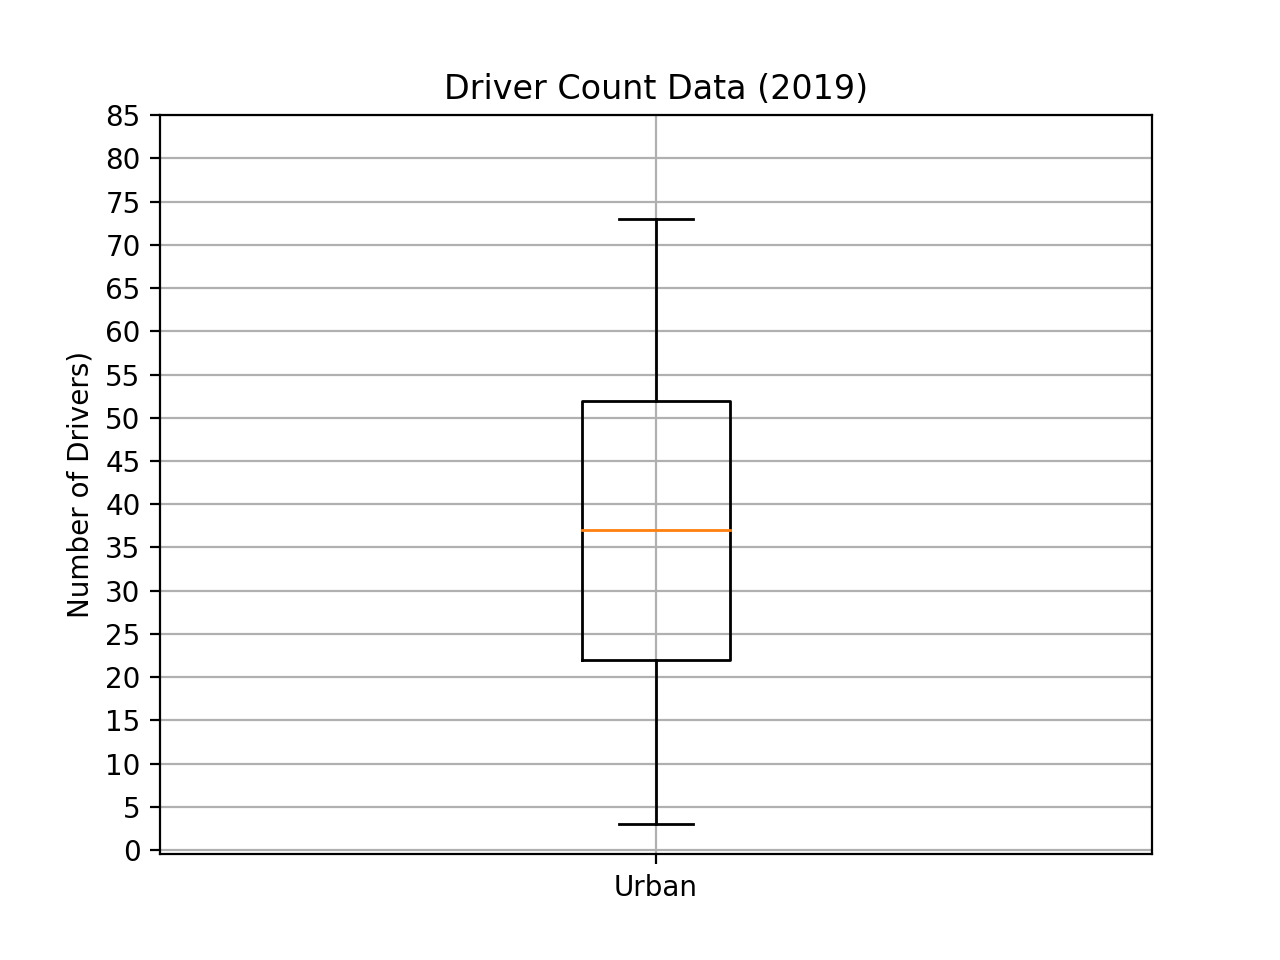

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [56]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

<IPython.core.display.Javascript object>


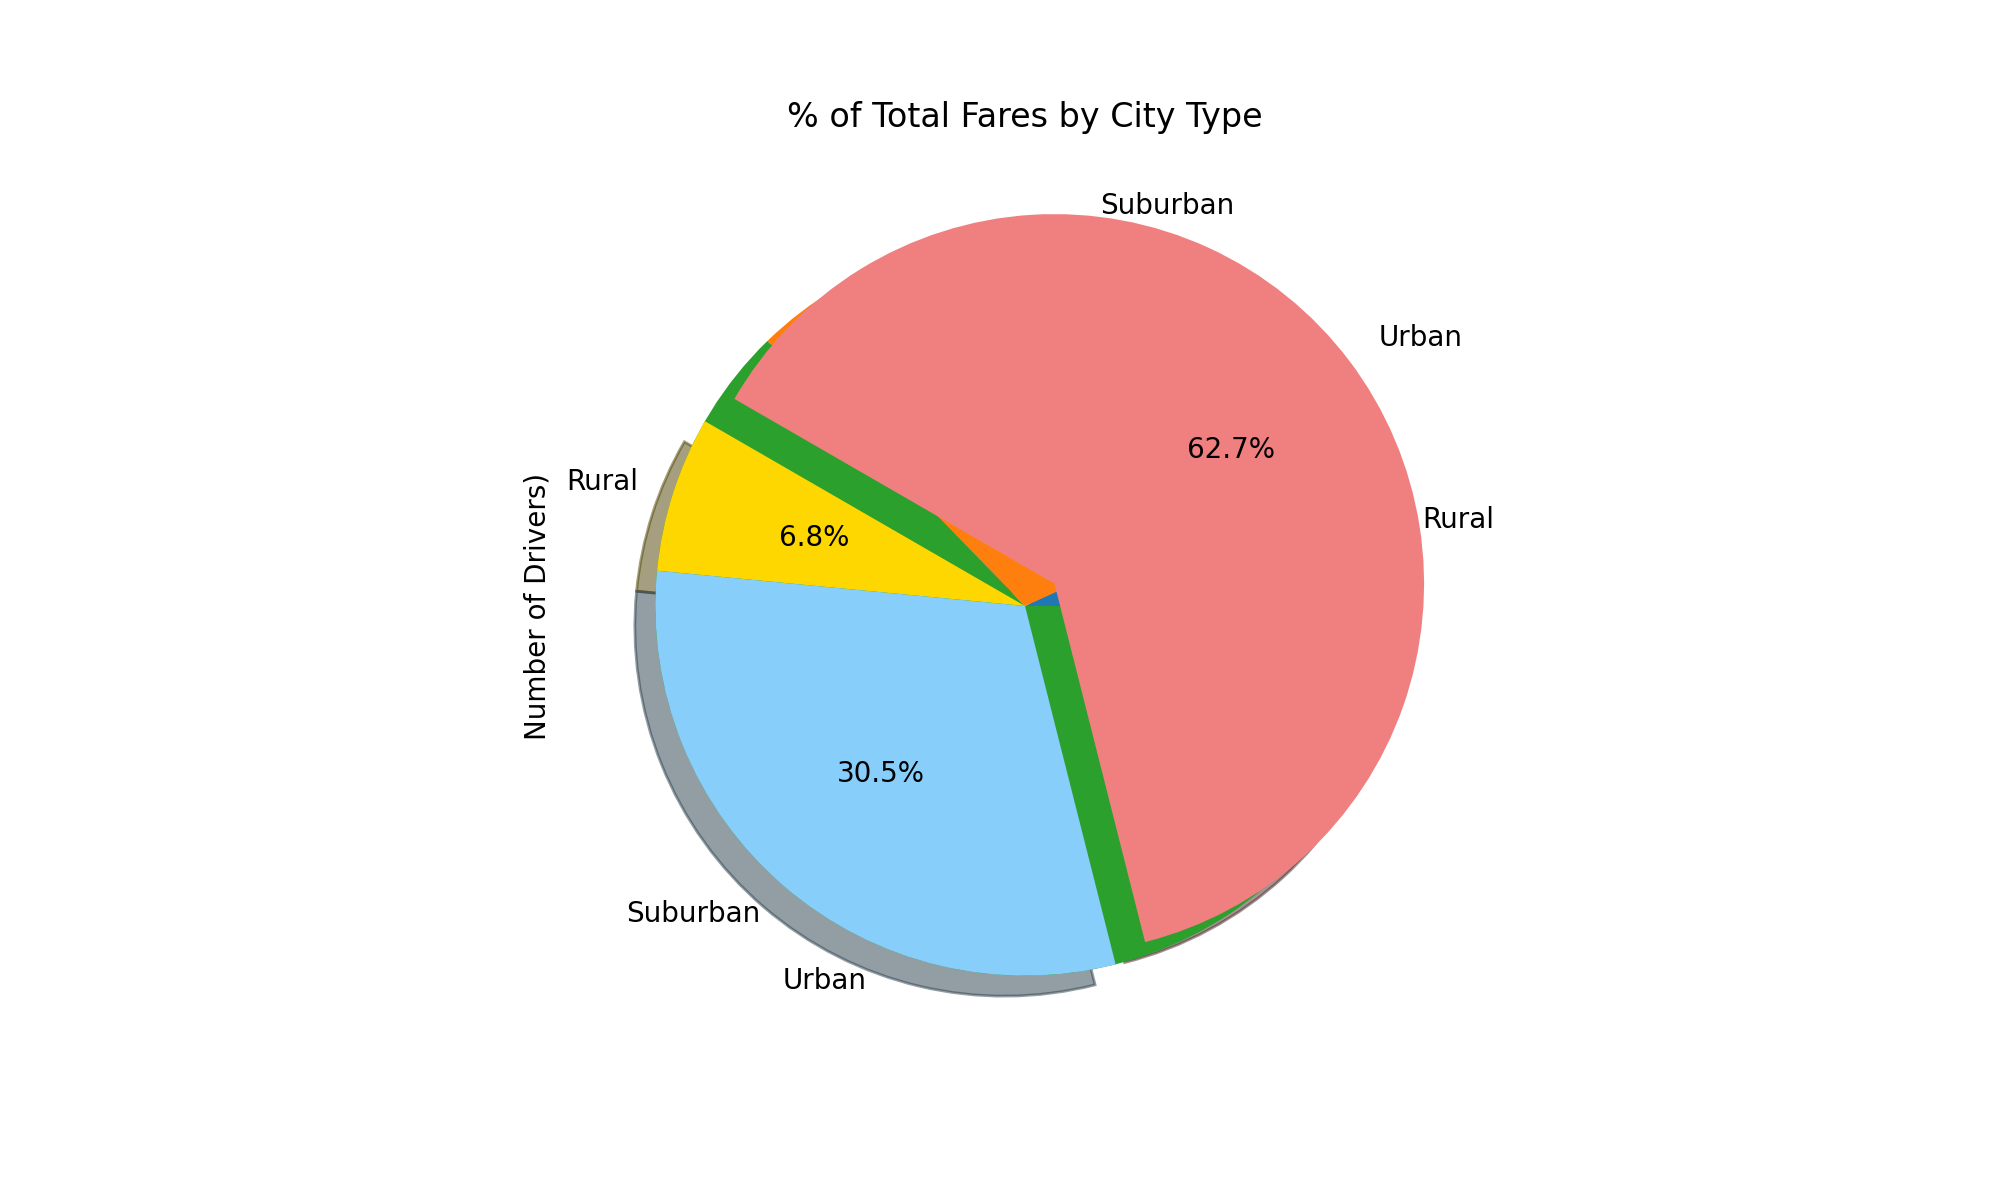

Summary Statistics


In [57]:
# Create the box-and-whisker plot for the urban, suburban and rural driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
plt.savefig("analysis/Fig4.png")
print("Summary Statistics")

In [58]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [59]:
#total fares 
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [60]:
type_percents = 100 * sum_fares_by_type/total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [61]:
#build the percentage of fares by city type pie chart 
plt.pie(type_percents, labels=["Rural", 'Suburban','Urban'])
plt.show()

In [62]:
#import matplotlib to use rcParams() and change fontsize
import matplotlib as mpl 

#edit the pie chart 
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size']
# Show Figure
plt.show()